In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from pywaffle import Waffle
import plotly.express as px
import numpy as np
import seaborn as sns

df1=pd.read_csv("subject-info.csv")
df2=pd.read_csv("test_measure.csv")

#removing duplicates
df1=df1.sort_values(by='ID')
df2=df2.sort_values(by=['ID','time'])
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df1=df1.drop_duplicates(keep='first')
df2 = df2.drop_duplicates(keep='first')

## AQ 1. Generate Guage chart for Male and Female KPIs in the Trademill test data

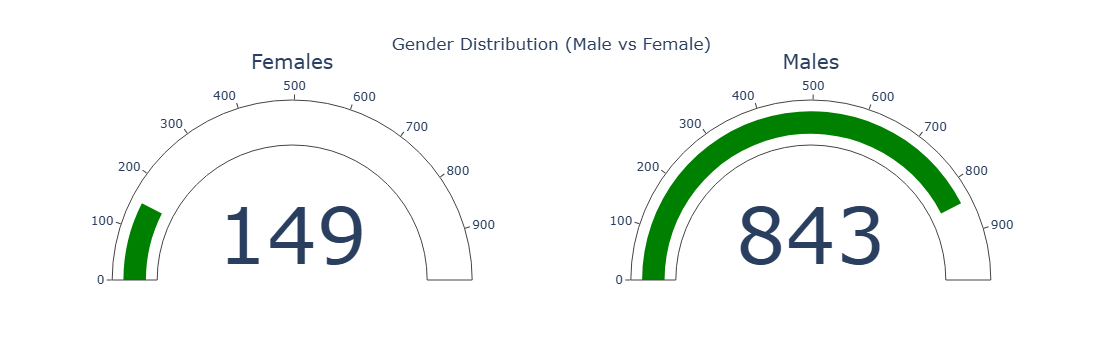

In [25]:
#AQ 1. Generate Guage chart for Male and Female KPIs in the Trademill test data
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the datasets
test_measure = pd.read_csv("test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

# Map numerical values to 'Male' and 'Female'
subject_info['Sex'] = subject_info['Sex'].map({0: 'Male', 1: 'Female'})

# Count the number of males and females
gender_count = subject_info['Sex'].value_counts()

# Create subplots with the domain type for Gauge charts
fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{"type": "indicator"}, {"type": "indicator"}]],
   )

# Add Female Gauge
fig.add_trace(
    go.Indicator(
        mode="gauge+number",
        value=gender_count['Female'],
        title={'text': "Females"},
        gauge={'axis': {'range': [0, gender_count.sum()]}}
    ),
    row=1, col=1
)

# Add Male Gauge
fig.add_trace(
    go.Indicator(
        mode="gauge+number",
        value=gender_count['Male'],
        title={'text': "Males"},
        gauge={'axis': {'range': [0, gender_count.sum()]}}
    ),
    row=1, col=2
)

# Update layout for better visualization
fig.update_layout(title_text="Gender Distribution (Male vs Female)", title_x=0.5)

# Display the chart
fig.show()

## AQ2. Calculate average VO2 max values between male and female athletes?

In [27]:
#AQ2. Calculate average VO2 max values between male and female athletes?

import pandas as pd

# Load the datasets
test_measure = pd.read_csv("test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

# Map numerical values to 'Male' and 'Female'
subject_info['Sex'] = subject_info['Sex'].map({0: 'Male', 1: 'Female'})

# Step 1: Calculate VO2 max for each participant
vo2_max_data = test_measure.groupby('ID_test')['VO2'].max().reset_index()
vo2_max_data.rename(columns={'VO2': 'VO2_max'}, inplace=True)

# Format the VO2_max column to 2 decimal places
vo2_max_data['VO2_max'] = vo2_max_data['VO2_max'].round(2)

# Step 2: Merge VO2 max data with subject-info
merged_data = pd.merge(vo2_max_data, subject_info, on='ID_test')

# Step 3: Group by gender and calculate the average VO2 max
average_vo2_max = merged_data.groupby('Sex')['VO2_max'].mean()

# Format average VO2 max to 2 decimal places
average_vo2_max = average_vo2_max.round(2)

# Display the results
print("Average VO2 max values by gender:")
print(average_vo2_max)

Average VO2 max values by gender:
Sex
Female    2547.74
Male      3736.22
Name: VO2_max, dtype: float64


## AQ3: List Average Height and Weight of Athelets by Gender

In [29]:
#AQ3: List Average Height and Weight of Athelets by Gender
import pandas as pd
# Load the datasets
subject_info = pd.read_csv("subject-info.csv")

# Map numerical gender values (0 -> Male, 1 -> Female)
subject_info['Sex'] = subject_info['Sex'].map({0: 'Male', 1: 'Female'})

# Group data by gender and calculate the mean height and weight
average_stats = subject_info.groupby('Sex')[['Height', 'Weight']].mean().round(2)

# Print the results
print("Average Height and Weight by Gender:")
print('\n')
print(average_stats)

Average Height and Weight by Gender:


        Height  Weight
Sex                   
Female  166.79   62.70
Male    176.35   75.27


## AQ 4 . Analyze if there are differences in peak treadmill speeds achieved across genders and age brackets

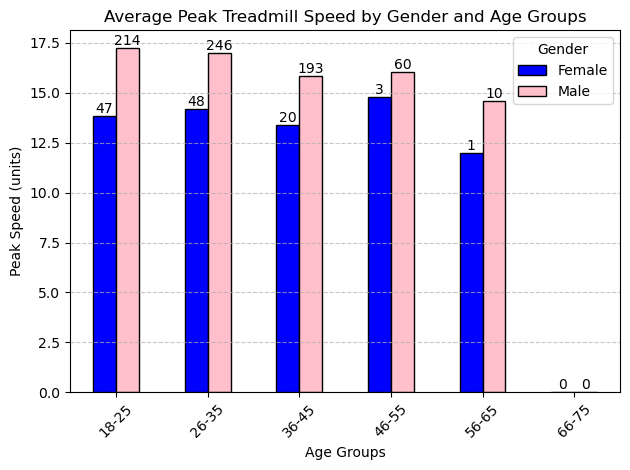

In [31]:
#AQ 4 . Analyze if there are differences in peak treadmill speeds achieved across genders and age brackets
# Step 1: Calculate peak speed for each participant
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
test_measure = pd.read_csv("test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

peak_speed_data = test_measure.groupby('ID_test')['Speed'].max().reset_index()
peak_speed_data.rename(columns={'Speed': 'peak_speed'}, inplace=True)

# Step 2: Merge peak speed data with subject demographic information
merged_data = pd.merge(peak_speed_data, subject_info, on='ID_test')

# Step 3: Map numerical gender values (0 -> Male, 1 -> Female)
merged_data['Sex'] = merged_data['Sex'].map({0: 'Male', 1: 'Female'})

# Step 4: Create age brackets
bins = [18, 25, 35, 45, 55, 65, 75]  # Define age bins
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']  # Age group labels
merged_data['Age_Group'] = pd.cut(merged_data['Age'], bins=bins, labels=labels)

# Step 5: Group by gender and age brackets, and calculate average peak speed
peak_speed_analysis = merged_data.groupby(['Sex', 'Age_Group'], observed=False)['peak_speed'].mean().unstack('Sex')

# Step 5: Group by gender and age brackets, calculate average peak speed, and count athletes
peak_speed_analysis_Count = merged_data.groupby(['Sex', 'Age_Group'], observed=False).agg(
    peak_speed=('peak_speed', 'mean'), count=('peak_speed', 'size')).unstack('Sex')

# Separate mean speeds and counts
#peak_speed_means = peak_speed_analysis['peak_speed']
athlete_counts = peak_speed_analysis_Count['count']

# Step 6: Plot the results
# Define custom colors for male and female
colors = {'Male': 'blue', 'Female': 'pink'}
#peak_speed_analysis.plot(kind='bar', edgecolor='black', colormap='viridis')
ax = peak_speed_analysis.plot(kind='bar', 
                         color=[colors['Male'], colors['Female']], 
                         edgecolor='black')

# Add data labels (athlete counts) above bars
for container, counts in zip(ax.containers, athlete_counts.T.values):
    ax.bar_label(container, labels=[f'{int(c)}' for c in counts], label_type='edge')
    
plt.title("Average Peak Treadmill Speed by Gender and Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Peak Speed (units)")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## AQ5. Performance metrics of VO2 across ranges of temperature and humidity

Performance Metrics by Temperature Range:
                           VO2
Temperature_Range             
<20°C              2281.152266
20-30°C            2316.517282
30-40°C            2376.358459

Performance Metrics by Humidity Range:
                        VO2
Humidity_Range             
<30%            2119.032343
30-60%          2310.812685
60-90%          2326.724340


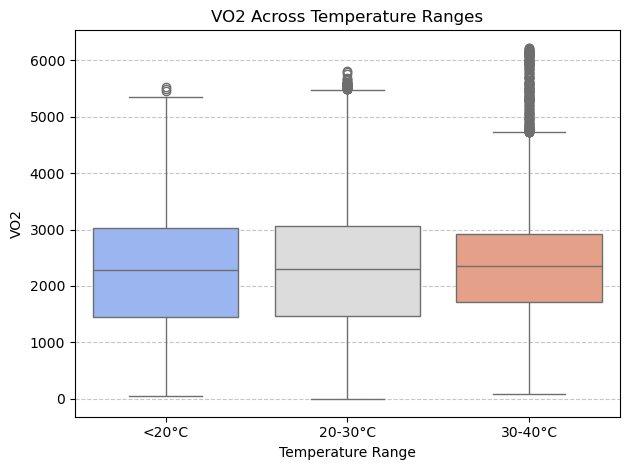

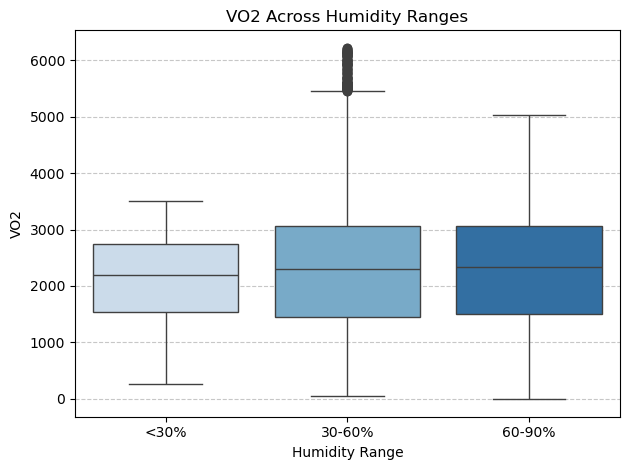

In [63]:
#AQ5. Performance metrics of VO2 across ranges of temperature and humidity
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace these filenames with your actual filenames
performance_data = pd.read_csv("test_measure.csv")  # Contains VO2, RR, Peak Speed
environment_data = pd.read_csv("subject-info.csv")  # Contains Temperature, Humidity, ID_test

# Merge the datasets on the common identifier 'ID_test'
merged_data = pd.merge(performance_data, environment_data, on='ID_test')

# Step 1: Create temperature and humidity ranges
temp_bins = [0, 20, 30, 40]  # Define temperature bins
temp_labels = ['<20°C', '20-30°C', '30-40°C']
merged_data['Temperature_Range'] = pd.cut(merged_data['Temperature'], bins=temp_bins, labels=temp_labels)

humidity_bins = [0, 30, 60, 90]  # Define humidity bins
humidity_labels = ['<30%', '30-60%', '60-90%']
merged_data['Humidity_Range'] = pd.cut(merged_data['Humidity'], bins=humidity_bins, labels=humidity_labels)

# Step 2: Group by Temperature and Humidity ranges and calculate means
grouped_temp = merged_data.groupby('Temperature_Range', observed=False)[['VO2']].mean()
grouped_humidity = merged_data.groupby('Humidity_Range', observed=False)[['VO2']].mean()

# Print the results
print("Performance Metrics by Temperature Range:")
print(grouped_temp)
print("\nPerformance Metrics by Humidity Range:")
print(grouped_humidity)

# Step 3: Visualization
# Boxplot for Temperature vs VO2
sns.boxplot(x='Temperature_Range', y='VO2', data=merged_data, hue='Temperature_Range', palette='coolwarm', legend=False)
plt.title('VO2 Across Temperature Ranges')
plt.xlabel('Temperature Range')
plt.ylabel('VO2')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Boxplot for Humidity vs VO2
sns.boxplot(x='Humidity_Range', y='VO2',  data=merged_data, hue='Humidity_Range', palette='Blues',legend=False)
plt.title('VO2 Across Humidity Ranges')
plt.xlabel('Humidity Range')
plt.ylabel('VO2')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## AQ6. Print the athelet who took maximum number of tests with his age, Height and Weight

In [17]:
#AQ6. Print the athelet who took maximum number of tests with his age, Height and Weight
import pandas as pd

# Load the CSV files
test_measure = pd.read_csv("Test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

# Count the number of tests each subject has taken
test_counts = test_measure['ID_test'].value_counts()

# Find the subject ID with the maximum tests
max_tests_subject = test_counts.idxmax()

# Retrieve their details from the subject-info file
subject_details = subject_info[subject_info['ID_test'] == max_tests_subject]

# Print the subject's age, height, and weight line by line
print(f"Athlet who has taken maximum Test is : {subject_details['ID'].values[0]}")
print(f"Age: {subject_details['Age'].values[0]}")
print(f"Height: {subject_details['Height'].values[0]}")
print(f"Weight: {subject_details['Weight'].values[0]}")

Athlet who has taken maximum Test is : 431
Age: 18.0
Height: 171.0
Weight: 63.0


## AQ7.Find the subject with the lowest fitness 

In [45]:
#AQ7.Find the subject with the lowest fitness 
import pandas as pd

# Load the data
test_data = pd.read_csv("Test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

# Calculate BMI for each subject
subject_info['BMI'] = subject_info['Weight'] / ((subject_info['Height'] / 100) ** 2)

# Merge test data with subject info to include HR, BMI, and Age
merged_data = test_data.merge(subject_info, left_on='ID_test', right_on='ID_test')

# Aggregate metrics by ID_test
fitness_scores = merged_data[['ID_test', 'VO2', 'VCO2', 'RR', 'VE', 'HR', 'BMI', 'Age']].groupby('ID_test').mean()

# Normalize all metrics (higher VO2 and lower others indicate better fitness)
fitness_scores['Normalized_VO2'] = fitness_scores['VO2'] / fitness_scores['VO2'].max()
fitness_scores['Normalized_VCO2'] = fitness_scores['VCO2'] / fitness_scores['VCO2'].max()
fitness_scores['Normalized_RR'] = fitness_scores['RR'] / fitness_scores['RR'].max()
fitness_scores['Normalized_VE'] = fitness_scores['VE'] / fitness_scores['VE'].max()
fitness_scores['Normalized_HR'] = fitness_scores['HR'] / fitness_scores['HR'].max()
fitness_scores['Normalized_BMI'] = fitness_scores['BMI'] / fitness_scores['BMI'].max()

# Calculate fitness score (higher VO2 improves, higher others decrease fitness)
fitness_scores['Fitness_Score'] = (
    fitness_scores['Normalized_VO2'] -
    (fitness_scores['Normalized_VCO2'] +
     fitness_scores['Normalized_RR'] +
     fitness_scores['Normalized_VE'] +
     fitness_scores['Normalized_HR'] +
     fitness_scores['Normalized_BMI']) / 5
)
# Identify the athlete with the lowest fitness score
lowest_fitness_subject = fitness_scores['Fitness_Score'].idxmin()

# Retrieve details of the subject with the lowest fitness
subject_details = subject_info[subject_info['ID_test'] == lowest_fitness_subject]

# Print the subject ID and other details horizontally
print(f"Subject with lowest fitness: {subject_details['ID'].values[0]}")
print(f"Age={subject_details['Age'].values[0]}, Height={subject_details['Height'].values[0]} cm, "
      f"Weight={subject_details['Weight'].values[0]} kg, BMI={subject_details['BMI'].values[0]:.2f}")


Subject with lowest fitness: 820
Age=16.8, Height=160.6 cm, Weight=67.0 kg, BMI=25.98


## AQ8. Mean, Median and Mode of Age

In [65]:
#AQ8. Mean, Median and Mode of Age
import pandas as pd

# Load the subject information CSV file
subject_info = pd.read_csv("subject-info.csv")

# Filter data to include only female athletes
female_athletes = subject_info[subject_info['Sex'] == 1]

# Calculate mean, median, and mode of Age
mean_age = female_athletes['Age'].mean()
median_age = female_athletes['Age'].median()
mode_age = female_athletes['Age'].mode() # mode() can return multiple values, take the first one

# Print results
print(f"Mean Age of Female Athletes: {mean_age:.2f}")
print(f"Median Age of Female Athletes: {median_age:.2f}")
print(f"Mode Age of Female Athletes:\n{mode_age}")

Mean Age of Female Athletes: 26.04
Median Age of Female Athletes: 24.50
Mode Age of Female Athletes:
0    16.1
1    16.6
2    16.7
3    16.8
4    22.7
5    23.1
6    26.9
Name: Age, dtype: float64


## AQ9. Distribution chart of Fitness status by VO2 and BMI

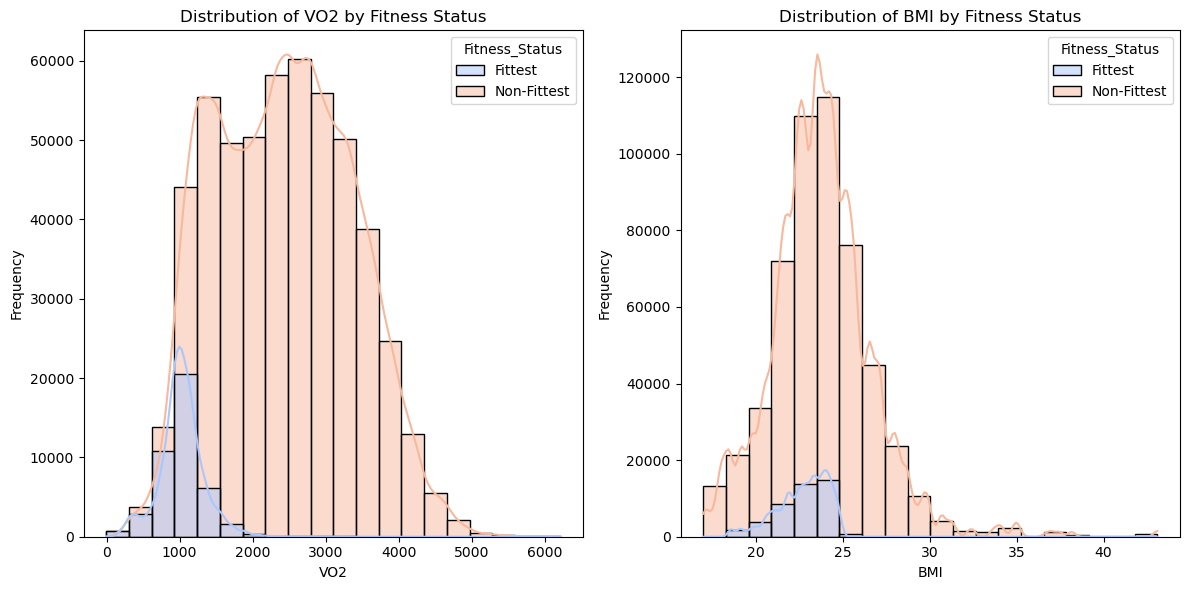

In [3]:
# AQ9. Distribution chart of Fitness status by VO2 and BMI
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
test_measure = pd.read_csv("test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

# Merge datasets based on participant ID
merged_data = pd.merge(test_measure, subject_info, on="ID_test")

# Calculate BMI (Weight in kg, Height in meters)
merged_data['Height_m'] = merged_data['Height'] / 100
merged_data['BMI'] = merged_data['Weight'] / (merged_data['Height_m'] ** 2)

# Define fitness criteria
def strong_fitness(row):
    if row['Sex'] == 'Male':
        vo2_condition = row['VO2'] > 50
    else:  # Female
        vo2_condition = row['VO2'] > 40
    hr_condition = 60 <= row['HR'] <= 100
    return 18.5 <= row['BMI'] <= 24.9 and vo2_condition and hr_condition

# Apply fitness classification
merged_data['Fitness_Status'] = merged_data.apply(strong_fitness, axis=1)
merged_data['Fitness_Status'] = merged_data['Fitness_Status'].replace({True: 'Fittest', False: 'Non-Fittest'})

# Plot distribution charts for VO2 and BMI based on fitness status
plt.figure(figsize=(12, 6))

# VO2 distribution
plt.subplot(1, 2, 1)
sns.histplot(data=merged_data, x='VO2', hue='Fitness_Status', kde=True, bins=20, palette="coolwarm")
plt.title('Distribution of VO2 by Fitness Status')
plt.xlabel('VO2')
plt.ylabel('Frequency')

# BMI distribution
plt.subplot(1, 2, 2)
sns.histplot(data=merged_data, x='BMI', hue='Fitness_Status', kde=True, bins=20, palette="coolwarm")
plt.title('Distribution of BMI by Fitness Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## AQ10. Calculate Fitness Score Table

In [62]:
# Calculate Fitness Score Table
import pandas as pd

# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('Test_measure.csv')

# Step 1: Process and group test_measure data
# Select only the necessary columns
columns_to_process = ['ID', 'VO2', 'VCO2', 'HR', 'RR', 'VE']
filtered_data = test_measure[columns_to_process]

# Ensure the selected columns are numeric (handling SettingWithCopyWarning)
for column in ['VO2', 'VCO2', 'HR', 'RR', 'VE']:
    filtered_data.loc[:, column] = pd.to_numeric(filtered_data[column], errors='coerce')

# Group by ID and calculate mean for each parameter
grouped_test_measure = filtered_data.groupby('ID', as_index=False).mean()

# Step 2: Calculate BMI in subject_info
subject_info['BMI'] = subject_info['Weight'] / (subject_info['Height'] ** 2)

# Step 3: Merge grouped test_measure with subject_info on 'ID'
merged_data = pd.merge(grouped_test_measure, subject_info, on='ID')

# Step 4: Define a function to calculate Fitness Score
def calculate_fitness(row):
    # Simple scoring conditions
    bmi_score = 10 if row['BMI'] < 25 else 5
    vo2_score = 10 if row['VO2'] > 2.0 else 5
    vco2_score = 10 if row['VCO2'] > 1.5 else 5
    hr_score = 10 if 60 <= row['HR'] <= 80 else 5
    rr_score = 10 if row['RR'] < 20 else 5
    ve_score = 10 if row['VE'] < 30 else 5
    
    # Calculate overall Fitness Score
    fitness_score = (bmi_score + vo2_score + vco2_score + hr_score + rr_score + ve_score) / 6
    return fitness_score

# Apply the Fitness Score calculation
merged_data['Fitness_Score'] = merged_data.apply(calculate_fitness, axis=1)

# Step 5: Display the output
print(merged_data[['ID', 'Fitness_Score']].to_string(index=False))

 ID  Fitness_Score
  1       7.500000
  2       7.500000
  3       7.500000
  4       7.500000
  5       7.500000
  6       7.500000
  7       7.500000
  7       7.500000
  8       7.500000
  9       7.500000
 10       7.500000
 11       7.500000
 12       7.500000
 13       7.500000
 14       7.500000
 15       7.500000
 15       7.500000
 15       7.500000
 16       7.500000
 17       7.500000
 18       7.500000
 19       7.500000
 19       7.500000
 20       7.500000
 21       7.500000
 22       7.500000
 23       7.500000
 24       7.500000
 25       7.500000
 26       7.500000
 27       7.500000
 28       7.500000
 29       7.500000
 30       7.500000
 31       7.500000
 32       7.500000
 33       7.500000
 34       7.500000
 35       7.500000
 36       7.500000
 36       7.500000
 37       7.500000
 38       7.500000
 39       7.500000
 40       7.500000
 41       7.500000
 42       7.500000
 43       7.500000
 44       7.500000
 45       7.500000
 45       7.500000
 46       7.